In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

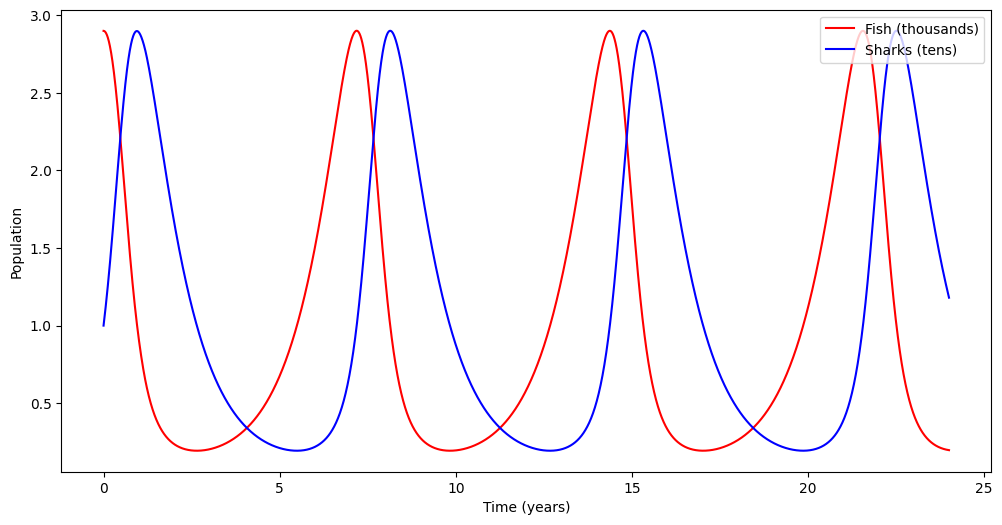

In [42]:
def du_dt(t, u, a = 1, b = 1, c = 1, d = 1):
    x, y = u
    return [a * x - b * x * y, - c * y + d * x * y]

t = np.linspace(0, 24, 4000)
u0 = [2.9, 1.0]

sol = solve_ivp(du_dt, [t[0], t[-1]], u0, t_eval = t, method = 'DOP853', atol = 1e-9, args = (1, 1, 1, 1))
fish = sol.y[0]
sharks = sol.y[1]
U = np.log(sharks) + np.log(fish) - sharks - fish

plt.figure(figsize = (12, 6))
plt.plot(t, fish, color = 'red', label = 'Fish (thousands)')
plt.plot(t, sharks, color = 'blue', label = 'Sharks (tens)')
plt.xlabel('Time (years)')
plt.ylabel('Population')
plt.legend(loc='upper right')

Text(0, 0.5, 'Sharks (tens)')

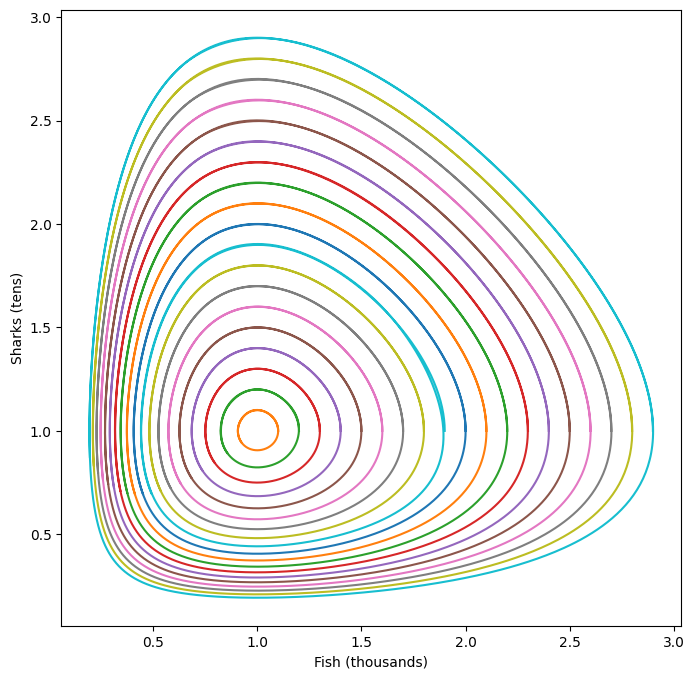

In [40]:
plt.figure(figsize = (8, 8))
t = np.linspace(0, 10, 1000)
ics = np.arange(1.0, 3.0, 0.1)
for f0 in ics:
    sol = solve_ivp(du_dt, [t[0], t[-1]], [f0, 1.0], t_eval = t, method = 'DOP853', atol = 1e-9, args = (1, 1, 1, 1))
    plt.plot(sol.y[0], sol.y[1])
plt.xlabel('Fish (thousands)')
plt.ylabel('Sharks (tens)')